In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import spherical_jn
from mottmassey import mm_potential
import bind
import utility
import constants as const

In [2]:
r, wr = utility.log_mesh(0, 10*const.BETA4, 2000)
q, wq = utility.log_mesh(0, 10*2/1.5, 200)

v_tilde_mm = utility.ft_matrix_gen(mm_potential, 0, 0, q, r, wr)

In [3]:
evals, evecs = bind.bound_states(v_tilde_mm, 0, 0, q, wq)

In [4]:
def ftr(state, r, wr, q, wq):
    y = np.array([np.sum(np.sqrt(2/np.pi) * wq * q**2 * state * spherical_jn(0, q*ri)) for ri in r])
    return 1/np.sqrt(np.sum(wr * r**2 * y**2)) * y

In [10]:
u = ftr(evecs[:, 0], r, wr, q, wq)

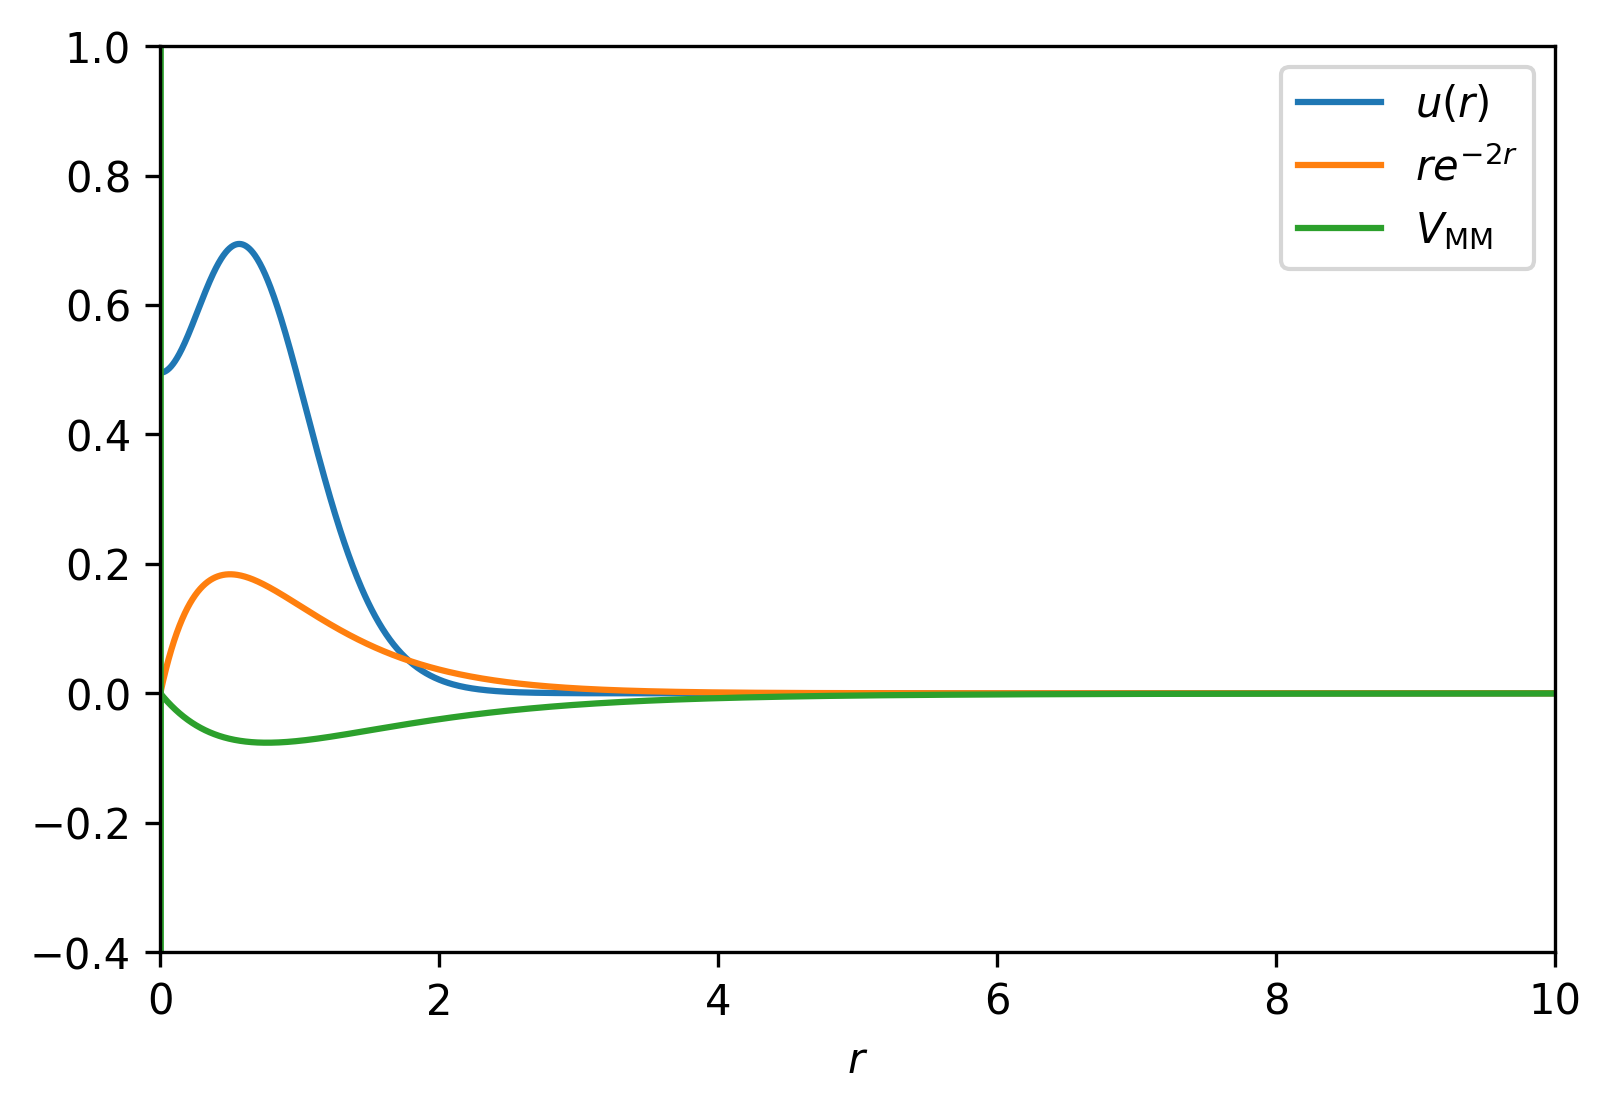

In [15]:
fig, ax = plt.subplots(dpi=300)
fig.patch.set_facecolor('white')

ax.plot(r, u, label='$u(r)$')
ax.plot(r, r*np.exp(-2*r), label=r'$re^{-2r}$')
ax.plot(r, mm_potential(r), label=r'$V_{\rm MM}$')

ax.set_ylim([-0.4, 1])
ax.legend()
ax.set_xlim([0, 10])
ax.set_xlabel(r'$r$');

In [19]:
ii = np.where(r < 3)[0]
np.sum(wr[ii]*r[ii]**2*u[ii]**2)

0.01236509025912537

In [20]:
r[-1]

327.0982419853719